In [1]:
import pandas as pd
import numpy as np
from sklearn import decomposition, preprocessing

In [2]:
population=pd.read_csv("Data/population1.csv")
bilan_alimentaire=pd.read_csv("Data/bilan_alimentaire.csv")
PIB=pd.read_csv("Data/PIB1.csv")

# 1) Population 

In [3]:
population.head(n=20)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2013,2013,1000 personnes,31731.688,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2014,2014,1000 personnes,32758.020,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
2,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2013,2013,1000 personnes,53767.396,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
3,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2014,2014,1000 personnes,54539.571,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
4,OA,Séries temporelles annuelles,3,Albanie,511,Population totale,3010,Population-Estimations,2013,2013,1000 personnes,2918.978,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
5,OA,Séries temporelles annuelles,3,Albanie,511,Population totale,3010,Population-Estimations,2014,2014,1000 personnes,2920.775,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
6,OA,Séries temporelles annuelles,4,Algérie,511,Population totale,3010,Population-Estimations,2013,2013,1000 personnes,38338.562,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
7,OA,Séries temporelles annuelles,4,Algérie,511,Population totale,3010,Population-Estimations,2014,2014,1000 personnes,39113.313,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
8,OA,Séries temporelles annuelles,79,Allemagne,511,Population totale,3010,Population-Estimations,2013,2013,1000 personnes,81265.139,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
9,OA,Séries temporelles annuelles,79,Allemagne,511,Population totale,3010,Population-Estimations,2014,2014,1000 personnes,81489.660,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."


In [4]:
population=population.fillna(0)

In [5]:
population=population[['Zone','Année','Valeur','Code Élément','Code zone']]

In [6]:
population['Valeur']=population['Valeur']*1000

In [7]:
population.head(n=10)

,Zone,Année,Valeur,Code Élément,Code zone
0,Afghanistan,2013,31731688.0,511,2
1,Afghanistan,2014,32758020.0,511,2
2,Afrique du Sud,2013,53767396.0,511,202
3,Afrique du Sud,2014,54539571.0,511,202
4,Albanie,2013,2918978.0,511,3
5,Albanie,2014,2920775.0,511,3
6,Algérie,2013,38338562.0,511,4
7,Algérie,2014,39113313.0,511,4
8,Allemagne,2013,81265139.0,511,79
9,Allemagne,2014,81489660.0,511,79


In [8]:
pays=population['Zone'].unique()

In [9]:
population=population.pivot_table(values="Valeur", index=["Zone"],columns="Année",aggfunc='sum')

In [10]:
population=population.reset_index()

In [11]:
print(population.columns)

Index(['Zone', 2013, 2014], dtype='object', name='Année')


In [12]:
population.columns=['Pays', '2013','2014']

In [13]:
print(population.columns)

Index(['Pays', '2013', '2014'], dtype='object')


In [14]:
population['Evolution_pop']=((population['2014']-population['2013'])/population['2013'])*100

In [15]:
population.head()

,Pays,2013,2014,Evolution_pop
0,Afghanistan,31731688.0,32758020.0,3.234407
1,Afrique du Sud,53767396.0,54539571.0,1.436140
2,Albanie,2918978.0,2920775.0,0.061563
3,Algérie,38338562.0,39113313.0,2.020814
4,Allemagne,81265139.0,81489660.0,0.276282


In [16]:
# Evolution_pop (2014-2013/2013)*100

# Bilan_Alimentaire

In [17]:
bilan_alimentaire.head(n=3)

,Code Domaine,Domaine,Code Pays,Pays,Code Élément,Élément,Code Produit,Produit,Code Année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires,2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2903,Produits Vegetaux,2013,2013,Kcal/personne/jour,1873.00,Fc,Donnée calculée
1,FBS,Bilans Alimentaires,2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2903,Produits Vegetaux,2013,2013,g/personne/jour,46.03,Fc,Donnée calculée
2,FBS,Bilans Alimentaires,2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2941,Produits Animaux,2013,2013,Kcal/personne/jour,216.00,Fc,Donnée calculée


In [18]:
bilan_alimentaire=bilan_alimentaire.fillna(0)

In [19]:
bilan_alimentaire=bilan_alimentaire[['Code Pays','Pays','Code Produit','Produit','Code Produit','Année','Valeur','Élément','Code Élément']]

In [20]:
bilan_alimentaire.head(n=10)

,Code Pays,Pays,Code Produit,Produit,Code Produit,Année,Valeur,Élément,Code Élément
0,2,Afghanistan,2903,Produits Vegetaux,2903,2013,1873.00,Disponibilité alimentaire (Kcal/personne/jour),664
1,2,Afghanistan,2903,Produits Vegetaux,2903,2013,46.03,Disponibilité de protéines en quantité (g/pers...,674
2,2,Afghanistan,2941,Produits Animaux,2941,2013,216.00,Disponibilité alimentaire (Kcal/personne/jour),664
3,2,Afghanistan,2941,Produits Animaux,2941,2013,12.22,Disponibilité de protéines en quantité (g/pers...,674
4,202,Afrique du Sud,2903,Produits Vegetaux,2903,2013,2534.00,Disponibilité alimentaire (Kcal/personne/jour),664
5,202,Afrique du Sud,2903,Produits Vegetaux,2903,2013,48.94,Disponibilité de protéines en quantité (g/pers...,674
6,202,Afrique du Sud,2941,Produits Animaux,2941,2013,488.00,Disponibilité alimentaire (Kcal/personne/jour),664
7,202,Afrique du Sud,2941,Produits Animaux,2941,2013,36.38,Disponibilité de protéines en quantité (g/pers...,674
8,3,Albanie,2903,Produits Vegetaux,2903,2013,2206.00,Disponibilité alimentaire (Kcal/personne/jour),664
9,3,Albanie,2903,Produits Vegetaux,2903,2013,52.00,Disponibilité de protéines en quantité (g/pers...,674


# A-Ratio_Animal

In [21]:
Ratio_Animal=bilan_alimentaire.loc[(bilan_alimentaire['Code Élément']==674),:]

In [22]:
Ratio_Animal.head(n=5)

,Code Pays,Pays,Code Produit,Produit,Code Produit,Année,Valeur,Élément,Code Élément
1,2,Afghanistan,2903,Produits Vegetaux,2903,2013,46.03,Disponibilité de protéines en quantité (g/pers...,674
3,2,Afghanistan,2941,Produits Animaux,2941,2013,12.22,Disponibilité de protéines en quantité (g/pers...,674
5,202,Afrique du Sud,2903,Produits Vegetaux,2903,2013,48.94,Disponibilité de protéines en quantité (g/pers...,674
7,202,Afrique du Sud,2941,Produits Animaux,2941,2013,36.38,Disponibilité de protéines en quantité (g/pers...,674
9,3,Albanie,2903,Produits Vegetaux,2903,2013,52.00,Disponibilité de protéines en quantité (g/pers...,674


In [23]:
Ratio_Animal=Ratio_Animal.pivot_table(values="Valeur", index=["Pays"],columns="Produit",aggfunc='sum')

In [24]:
Ratio_Animal.head()

Produit,Produits Animaux,Produits Vegetaux
Pays,,
Afghanistan,12.22,46.03
Afrique du Sud,36.38,48.94
Albanie,59.42,52.00
Algérie,24.99,66.97
Allemagne,61.48,40.11


In [25]:
#ratio_animal=(2941/2903+2941)*100

In [26]:
print(Ratio_Animal.columns)

Index(['Produits Animaux', 'Produits Vegetaux'], dtype='object', name='Produit')


In [27]:
Ratio_Animal['Ratio_Animal']=(Ratio_Animal['Produits Animaux'])/(Ratio_Animal['Produits Animaux']+Ratio_Animal['Produits Vegetaux'])

In [28]:
Ratio_Animal.head().reset_index()

Produit,Pays,Produits Animaux,Produits Vegetaux,Ratio_Animal
0,Afghanistan,12.22,46.03,0.209785
1,Afrique du Sud,36.38,48.94,0.426395
2,Albanie,59.42,52.00,0.533297
3,Algérie,24.99,66.97,0.271749
4,Allemagne,61.48,40.11,0.605178


In [29]:
Ratio_Animal=Ratio_Animal.drop(columns=['Produits Animaux', 'Produits Vegetaux']).reset_index()

# B-Dispo_pro

In [30]:
Dispo_pro=bilan_alimentaire.loc[(bilan_alimentaire['Code Élément']==674),:]

In [31]:
#DA_pro=2093+2941

In [32]:
Dispo_pro=Dispo_pro.pivot_table(values="Valeur", index=["Pays"],columns="Produit",aggfunc='sum')

In [33]:
Dispo_pro.head()

Produit,Produits Animaux,Produits Vegetaux
Pays,,
Afghanistan,12.22,46.03
Afrique du Sud,36.38,48.94
Albanie,59.42,52.00
Algérie,24.99,66.97
Allemagne,61.48,40.11


In [34]:
Dispo_pro['DA_pro']=Dispo_pro['Produits Animaux']+Dispo_pro['Produits Vegetaux']

In [35]:
Dispo_pro.head().reset_index()

Produit,Pays,Produits Animaux,Produits Vegetaux,DA_pro
0,Afghanistan,12.22,46.03,58.25
1,Afrique du Sud,36.38,48.94,85.32
2,Albanie,59.42,52.00,111.42
3,Algérie,24.99,66.97,91.96
4,Allemagne,61.48,40.11,101.59


In [36]:
Dispo_pro=Dispo_pro.drop(columns=['Produits Animaux', 'Produits Vegetaux']).reset_index()

# C)Dispo_Cal

In [37]:
Dispo_cal=bilan_alimentaire.loc[(bilan_alimentaire['Code Élément']==664),:]

In [38]:
Dispo_cal=Dispo_cal.pivot_table(values="Valeur", index=["Pays"],columns="Produit",aggfunc='sum')

In [39]:
Dispo_cal['DA_cal']=Dispo_cal['Produits Animaux']+Dispo_cal['Produits Vegetaux']

In [40]:
Dispo_cal.head().reset_index()

Produit,Pays,Produits Animaux,Produits Vegetaux,DA_cal
0,Afghanistan,216.0,1873.0,2089.0
1,Afrique du Sud,488.0,2534.0,3022.0
2,Albanie,987.0,2206.0,3193.0
3,Algérie,379.0,2917.0,3296.0
4,Allemagne,1044.0,2454.0,3498.0


In [41]:
print(Dispo_cal.columns)

Index(['Produits Animaux', 'Produits Vegetaux', 'DA_cal'], dtype='object', name='Produit')


In [42]:
Dispo_cal=Dispo_cal.drop(columns=['Produits Animaux', 'Produits Vegetaux']).reset_index()

In [43]:
print(Dispo_cal.columns)

Index(['Pays', 'DA_cal'], dtype='object', name='Produit')


In [44]:
#DA_cal=2093+2941

# D)PIB

In [45]:
PIB.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FS,Données de la sécurité alimentaire,2,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2013,2013,I$,1848.7,X,Sources internationales sûres
1,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2013,2013,I$,12339.7,X,Sources internationales sûres
2,FS,Données de la sécurité alimentaire,3,Albanie,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2013,2013,I$,10492.8,X,Sources internationales sûres
3,FS,Données de la sécurité alimentaire,4,Algérie,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2013,2013,I$,13253.6,X,Sources internationales sûres
4,FS,Données de la sécurité alimentaire,79,Allemagne,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2013,2013,I$,42914.5,X,Sources internationales sûres


In [46]:
PIB=PIB[['Zone','Valeur']]

In [47]:
PIB.head()

,Zone,Valeur
0,Afghanistan,1848.7
1,Afrique du Sud,12339.7
2,Albanie,10492.8
3,Algérie,13253.6
4,Allemagne,42914.5


In [48]:
PIB.columns=['Pays', 'Valeur_PIB']

In [49]:
PIB.head(n=2)

,Pays,Valeur_PIB
0,Afghanistan,1848.7
1,Afrique du Sud,12339.7


# Jointure 

In [50]:
print(population.shape)

(230, 4)


In [51]:
print(Ratio_Animal.shape)

(174, 2)


In [52]:
print(Dispo_pro.shape)

(174, 2)


In [53]:
print(Dispo_cal.shape)

(174, 2)


In [54]:
print(PIB.shape)

(188, 2)


In [55]:
final=population.merge(Ratio_Animal,how='inner',left_on='Pays',right_on='Pays')

In [56]:
final.head(n=3)

,Pays,2013,2014,Evolution_pop,Ratio_Animal
0,Afghanistan,31731688.0,32758020.0,3.234407,0.209785
1,Afrique du Sud,53767396.0,54539571.0,1.436140,0.426395
2,Albanie,2918978.0,2920775.0,0.061563,0.533297


In [57]:
final=final.merge(Dispo_pro,how='inner',left_on='Pays',right_on='Pays')

In [58]:
final.head(n=3)

,Pays,2013,2014,Evolution_pop,Ratio_Animal,DA_pro
0,Afghanistan,31731688.0,32758020.0,3.234407,0.209785,58.25
1,Afrique du Sud,53767396.0,54539571.0,1.436140,0.426395,85.32
2,Albanie,2918978.0,2920775.0,0.061563,0.533297,111.42


In [59]:
final=final.merge(Dispo_cal,how='inner',left_on='Pays',right_on='Pays')

In [60]:
final=final.merge(PIB,how='inner',left_on='Pays',right_on='Pays')

In [61]:
final=final.drop(columns=['2013', '2014'])

In [62]:
final.head(n=4)

,Pays,Evolution_pop,Ratio_Animal,DA_pro,DA_cal,Valeur_PIB
0,Afghanistan,3.234407,0.209785,58.25,2089.0,1848.7
1,Afrique du Sud,1.436140,0.426395,85.32,3022.0,12339.7
2,Albanie,0.061563,0.533297,111.42,3193.0,10492.8
3,Algérie,2.020814,0.271749,91.96,3296.0,13253.6


In [63]:
print(final.shape)

(167, 6)


In [64]:
final.set_index('Pays',inplace=True)

# ACP 

In [65]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing
from functions import *

# choix du nombre de composantes à calculer
n_comp = 5

# import de l'échantillon
data = final[["Evolution_pop","Ratio_Animal","DA_pro","DA_cal","Valeur_PIB"]]

# selection des colonnes à prendre en compte dans l'ACP
data_pca = data[["Evolution_pop","Ratio_Animal","DA_pro","DA_cal","Valeur_PIB"]]

# préparation des données pour l'ACP
#data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
names = data.index # ou data.index pour avoir les intitulés
features = data.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], labels = np.array(names))

plt.show()

In [66]:
 #CAH 

In [67]:
print(final.columns)

Index(['Evolution_pop', 'Ratio_Animal', 'DA_pro', 'DA_cal', 'Valeur_PIB'], dtype='object')


In [68]:
final

,Evolution_pop,Ratio_Animal,DA_pro,DA_cal,Valeur_PIB
Pays,,,,,
Afghanistan,3.234407,0.209785,58.25,2089.0,1848.7
Afrique du Sud,1.436140,0.426395,85.32,3022.0,12339.7
Albanie,0.061563,0.533297,111.42,3193.0,10492.8
Algérie,2.020814,0.271749,91.96,3296.0,13253.6
Allemagne,0.276282,0.605178,101.59,3498.0,42914.5
Angola,3.546865,0.321341,57.26,2473.0,6188.0
Antigua-et-Barbuda,1.074378,0.678891,83.71,2417.0,18823.8
Arabie saoudite,2.779297,0.435774,91.63,3256.0,49537.6
Argentine,1.038060,0.652246,102.63,3229.0,19482.2


# Clustering 

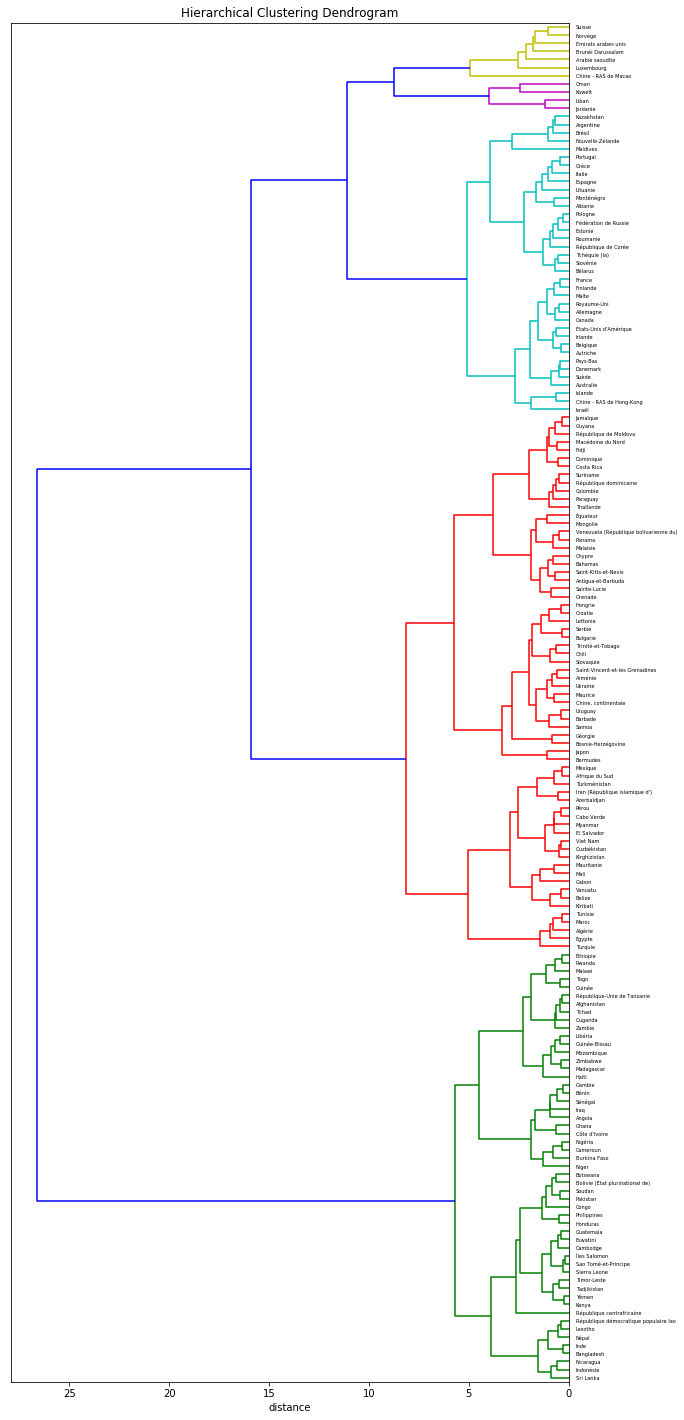

In [69]:
import pandas as pd
from functions import plot_dendrogram
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn import preprocessing

# import de l'échantillon et des informations relatives aux cours
data =final[['Evolution_pop', 'Ratio_Animal', 'DA_pro', 'DA_cal','Valeur_PIB']]
#courses_info = pd.read_csv('courses_info.csv',index_col = 0)

# Theme du ou des parcours auxquels appartient le cours (data, developpement, marketing, etc.)
#theme = [courses_info.loc[course_id, "theme"] for course_id in data.index]

# préparation des données pour le clustering
X = data.values
names =data.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')
color=8.5
# Affichage du dendrogramme
plot_dendrogram(Z, names,color)

 #Coupage du dendrogramme en 12 clusters
#clusters = fcluster(Z, 5, criterion='maxclust')
#clusters = fcluster(Z, 2, criterion='distance') # ligne équivalente à la précédente

# Comparaison des clusters trouvés avec les classification des cours en différents thèmes
#courses = pd.DataFrame({"theme": theme, "cluster": clusters, "title": names})
#print(courses.pivot_table(index="theme", columns="cluster", aggfunc=len, fill_value=0))

In [70]:
groupes_cah = fcluster(Z,t=8.5,criterion='distance') 
print(groupes_cah)
#index triés des groupes
import numpy as np
idg = np.argsort(groupes_cah)
#affichage des observations et leurs groupes
print(pd.DataFrame(final.index[idg],groupes_cah[idg]))

[1 2 3 2 3 1 2 5 3 2 3 3 2 2 1 2 3 2 2 1 2 1 5 3 2 1 3 1 2 1 1 3 2 3 5 2 2
 2 1 2 2 1 3 2 2 3 3 1 2 3 3 3 2 1 1 2 3 1 1 1 2 2 1 1 2 1 1 2 1 3 3 3 3 2
 2 4 3 1 2 2 4 1 2 4 1 3 5 2 1 2 1 3 2 3 2 2 2 2 2 3 1 2 1 1 1 5 3 1 4 1 2
 1 2 2 3 1 3 3 2 3 3 1 1 3 2 2 1 1 2 2 2 2 1 2 1 2 3 1 1 5 2 3 1 1 1 3 2 1
 1 2 2 2 2 2 2 2 2 2 1 1 1 2 5 2 3 1 1]
                    Pays
1            Afghanistan
1              Nicaragua
1             Mozambique
1                 Malawi
1             Madagascar
1                Libéria
1               Éthiopie
1                Lesotho
1                  Kenya
1                   Iraq
1              Indonésie
1                   Inde
1               Honduras
1                  Haïti
1          Guinée-Bissau
1                 Guinée
1              Guatemala
1                  Ghana
1                  Niger
1                Nigéria
1                  Népal
1                Ouganda
1               Zimbabwe
1                 Zambie
1                  Yémen
1         

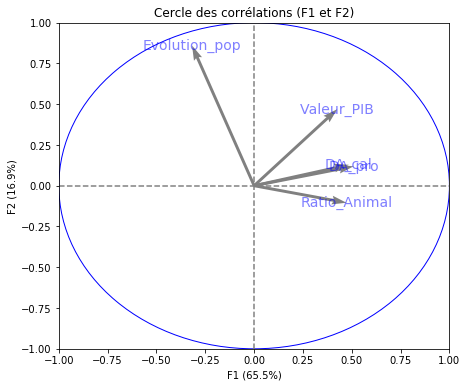

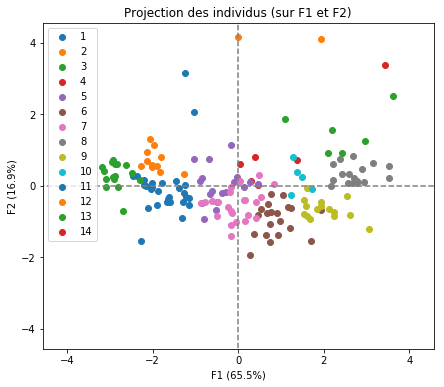

In [71]:
# Cercle des corrélations
#pcs = pca.components_
clusters = fcluster(Z, 14, criterion='maxclust')#modifier la valeur 14
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)],  illustrative_var= np.array(clusters))

plt.show()

In [152]:
Z

array([[1.32000000e+02, 1.66000000e+02, 2.05855228e-01, 2.00000000e+00],
       [7.70000000e+01, 1.58000000e+02, 2.14297866e-01, 2.00000000e+00],
       [1.40000000e+01, 6.50000000e+01, 2.83657800e-01, 2.00000000e+00],
       [2.70000000e+01, 5.30000000e+01, 2.93323687e-01, 2.00000000e+00],
       [5.10000000e+01, 1.16000000e+02, 3.01477343e-01, 2.00000000e+00],
       [1.34000000e+02, 1.67000000e+02, 3.09973738e-01, 3.00000000e+00],
       [2.40000000e+01, 1.33000000e+02, 3.23298343e-01, 2.00000000e+00],
       [9.40000000e+01, 1.50000000e+02, 3.27857832e-01, 2.00000000e+00],
       [1.21000000e+02, 1.65000000e+02, 3.43305729e-01, 2.00000000e+00],
       [6.00000000e+01, 7.30000000e+01, 3.48199505e-01, 2.00000000e+00],
       [3.00000000e+01, 1.04000000e+02, 3.48547951e-01, 2.00000000e+00],
       [0.00000000e+00, 1.27000000e+02, 3.51253980e-01, 2.00000000e+00],
       [1.00000000e+00, 9.70000000e+01, 3.57010168e-01, 2.00000000e+00],
       [8.80000000e+01, 1.60000000e+02, 3.67149603e

In [72]:
final['cluster']=clusters

In [73]:
print(final.loc[(final['cluster']==13),:])

                     Evolution_pop  Ratio_Animal  DA_pro  DA_cal  Valeur_PIB  \
Pays                                                                           
Arabie saoudite           2.779297      0.435774   91.63  3256.0     49537.6   
Brunéi Darussalam         1.475909      0.566856   93.41  2985.0     79070.2   
Luxembourg                2.128613      0.633298  113.88  3539.0     90656.4   
Norvège                   1.245002      0.595041  110.90  3486.0     62896.3   
Suisse                    1.192166      0.642136   93.08  3391.0     56535.7   
Émirats arabes unis       0.717323      0.398547  104.63  3280.0     61688.4   

                     cluster  
Pays                          
Arabie saoudite           13  
Brunéi Darussalam         13  
Luxembourg                13  
Norvège                   13  
Suisse                    13  
Émirats arabes unis       13  


In [74]:
final.head()

,Evolution_pop,Ratio_Animal,DA_pro,DA_cal,Valeur_PIB,cluster
Pays,,,,,,
Afghanistan,3.234407,0.209785,58.25,2089.0,1848.7,3
Afrique du Sud,1.436140,0.426395,85.32,3022.0,12339.7,5
Albanie,0.061563,0.533297,111.42,3193.0,10492.8,9
Algérie,2.020814,0.271749,91.96,3296.0,13253.6,4
Allemagne,0.276282,0.605178,101.59,3498.0,42914.5,8


In [75]:
fichier2=final.groupby(by=clusters).mean()#mettre dans une variable export csv

In [76]:
fichier2.head(n=14)

,Evolution_pop,Ratio_Animal,DA_pro,DA_cal,Valeur_PIB,cluster
1,1.748382,0.305171,61.693462,2398.115385,5042.188462,1
2,3.006708,0.216629,65.680909,2652.272727,4075.445455,2
3,2.734780,0.177884,53.393125,2202.875000,1655.337500,3
4,1.705363,0.284506,99.966000,3454.600000,12458.720000,4
5,1.714016,0.388774,81.678333,2841.555556,8401.744444,5
6,-0.127697,0.510580,86.586000,2970.650000,18879.895000,6
7,0.941040,0.529303,73.903043,2688.826087,14383.295652,7
8,0.636924,0.621752,111.721176,3456.000000,41869.258824,8
9,-0.164414,0.549543,104.396000,3344.066667,24340.206667,9
10,1.475718,0.618439,101.798000,3125.000000,20963.660000,10


In [147]:
print(final.loc[(final['cluster']==8),:])

                          Evolution_pop  Ratio_Animal  DA_pro  DA_cal  \
Pays                                                                    
Allemagne                      0.276282      0.605178  101.59  3498.0   
Australie                      1.399260      0.674381  106.29  3275.0   
Autriche                       0.646298      0.591846  106.21  3768.0   
Belgique                       0.606635      0.583534   99.60  3733.0   
Canada                         0.990577      0.521201  104.95  3494.0   
Chine - RAS de Hong-Kong       0.643373      0.730841  129.18  3290.0   
Danemark                       0.462892      0.641198  108.89  3367.0   
Finlande                       0.424915      0.620370  117.72  3368.0   
France                         0.423532      0.627431  110.53  3482.0   
Irlande                        0.093550      0.589219  110.01  3599.0   
Islande                        0.437270      0.722480  133.54  3379.0   
Israël                         1.537174      0.5655

In [148]:
from scipy.stats import ks_2samp, bartlett,ttest_ind
import numpy 

In [149]:
final.head(n=3)

,Evolution_pop,Ratio_Animal,DA_pro,DA_cal,Valeur_PIB,cluster
Pays,,,,,,
Afghanistan,3.234407,0.209785,58.25,2089.0,1848.7,3
Afrique du Sud,1.436140,0.426395,85.32,3022.0,12339.7,5
Albanie,0.061563,0.533297,111.42,3193.0,10492.8,9


In [150]:
ks_2samp(final["Evolution_pop"],list(numpy.random.normal(numpy.mean(final["Evolution_pop"]), numpy.std(final["Evolution_pop"]), 1000)))


Ks_2sampResult(statistic=0.07586227544910185, pvalue=0.3692845241336285)

In [151]:
ks_2samp(final["Valeur_PIB"],list(numpy.random.normal(numpy.mean(final["Valeur_PIB"]), numpy.std(final["Valeur_PIB"]), 1000)))

Ks_2sampResult(statistic=0.1696826347305389, pvalue=0.00044109609263427013)

In [152]:
cluster8=final.loc[(final['cluster']==8),'Evolution_pop']

In [153]:
cluster5=final.loc[(final['cluster']==5),'Evolution_pop']

In [154]:
bartlett(cluster5,cluster8)

BartlettResult(statistic=6.87103474926213, pvalue=0.008760391318214268)

In [155]:
ttest_ind(cluster5,cluster8, equal_var=False)

Ttest_indResult(statistic=5.455960391414747, pvalue=1.0867171774825219e-05)

In [156]:
final.head()

,Evolution_pop,Ratio_Animal,DA_pro,DA_cal,Valeur_PIB,cluster
Pays,,,,,,
Afghanistan,3.234407,0.209785,58.25,2089.0,1848.7,3
Afrique du Sud,1.436140,0.426395,85.32,3022.0,12339.7,5
Albanie,0.061563,0.533297,111.42,3193.0,10492.8,9
Algérie,2.020814,0.271749,91.96,3296.0,13253.6,4
Allemagne,0.276282,0.605178,101.59,3498.0,42914.5,8


In [157]:
final.to_csv('Data/fichier1.csv')

In [158]:
fichier2.to_csv('Data/fichier2.csv')